In [13]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.colors as mcolors
import sys
import os
import glob
from read_data.gmi_daily_v8 import GMIdaily

# 設置文件夾保存圖像
output_folder = "gmi_images"
os.makedirs(output_folder, exist_ok=True)

In [14]:
# 設置日期和文件類型
date = "20170822"  # 動態設置日期
dtype = "test_data"  # 文件所在資料夾

# 設置經緯度範圍
Lat_Min, Lat_Max = 0, 40
Lon_Min, Lon_Max = 100, 150

# 使用 glob 搜索符合條件的文件
file_pattern = f"{dtype}/f35_{date}v8.2.gz"
files = glob.glob(file_pattern)

In [15]:
# 使用 GMIdaily 加載文件
dataset = GMIdaily(file_pattern)

# 提取變數
sst = np.where(dataset.variables['sst'] < 251, dataset.variables['sst'], np.nan)
rain = np.where(dataset.variables['rain'] < 251, dataset.variables['rain'], np.nan)
Lat = dataset.variables['latitude'][:]
Lon = dataset.variables['longitude'][:]

# 計算合成數據
sst_composite = np.nanmean(sst, axis=0)
rain_composite = np.nanmean(rain, axis=0)
sstvp_composite = np.nansum(np.where(~np.isnan(sst), 1, np.nan), axis=0)

Plot_Lon, Plot_Lat = np.meshgrid(Lon, Lat)

/var/folders/lx/4bn5cmyn63b1p7gtb6m71jch0000gn/T/ipykernel_98700/3296046503.py:11: RuntimeWarning: Mean of empty slice
  sst_composite = np.nanmean(sst, axis=0)
/var/folders/lx/4bn5cmyn63b1p7gtb6m71jch0000gn/T/ipykernel_98700/3296046503.py:12: RuntimeWarning: Mean of empty slice
  rain_composite = np.nanmean(rain, axis=0)


In [16]:
# 通用繪圖函數
def plot_map(data, lat, lon, extent, cmap, colorbar_range, label, title, output_file):
    """
    通用繪圖函數
    """
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # 繪製數據
    Contourf = ax.pcolormesh(
        lon, lat, data,
        vmin=colorbar_range[0],
        vmax=colorbar_range[-1],
        transform=ccrs.PlateCarree(),
        cmap=cmap
    )
    
    # 設置顏色條
    cbar = fig.colorbar(
        Contourf,
        ticks=colorbar_range,
        location='bottom', orientation='horizontal',
        shrink=0.8, pad=0.04, aspect=25
    )
    cbar.set_label(label, fontsize=10)
    cbar.ax.tick_params(labelsize=10)
    
    # 設置地圖範圍和添加特徵
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.grid(alpha=0.6)
    ax.add_feature(cf.BORDERS, lw=0.5)
    ax.coastlines(resolution='10m')
    ax.set_xticks(np.arange(extent[0], extent[1], 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(extent[2], extent[3], 5), crs=ccrs.PlateCarree())
    
    # 設置標題和保存圖像
    plt.title(title, fontsize=12)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

### composite rain rate

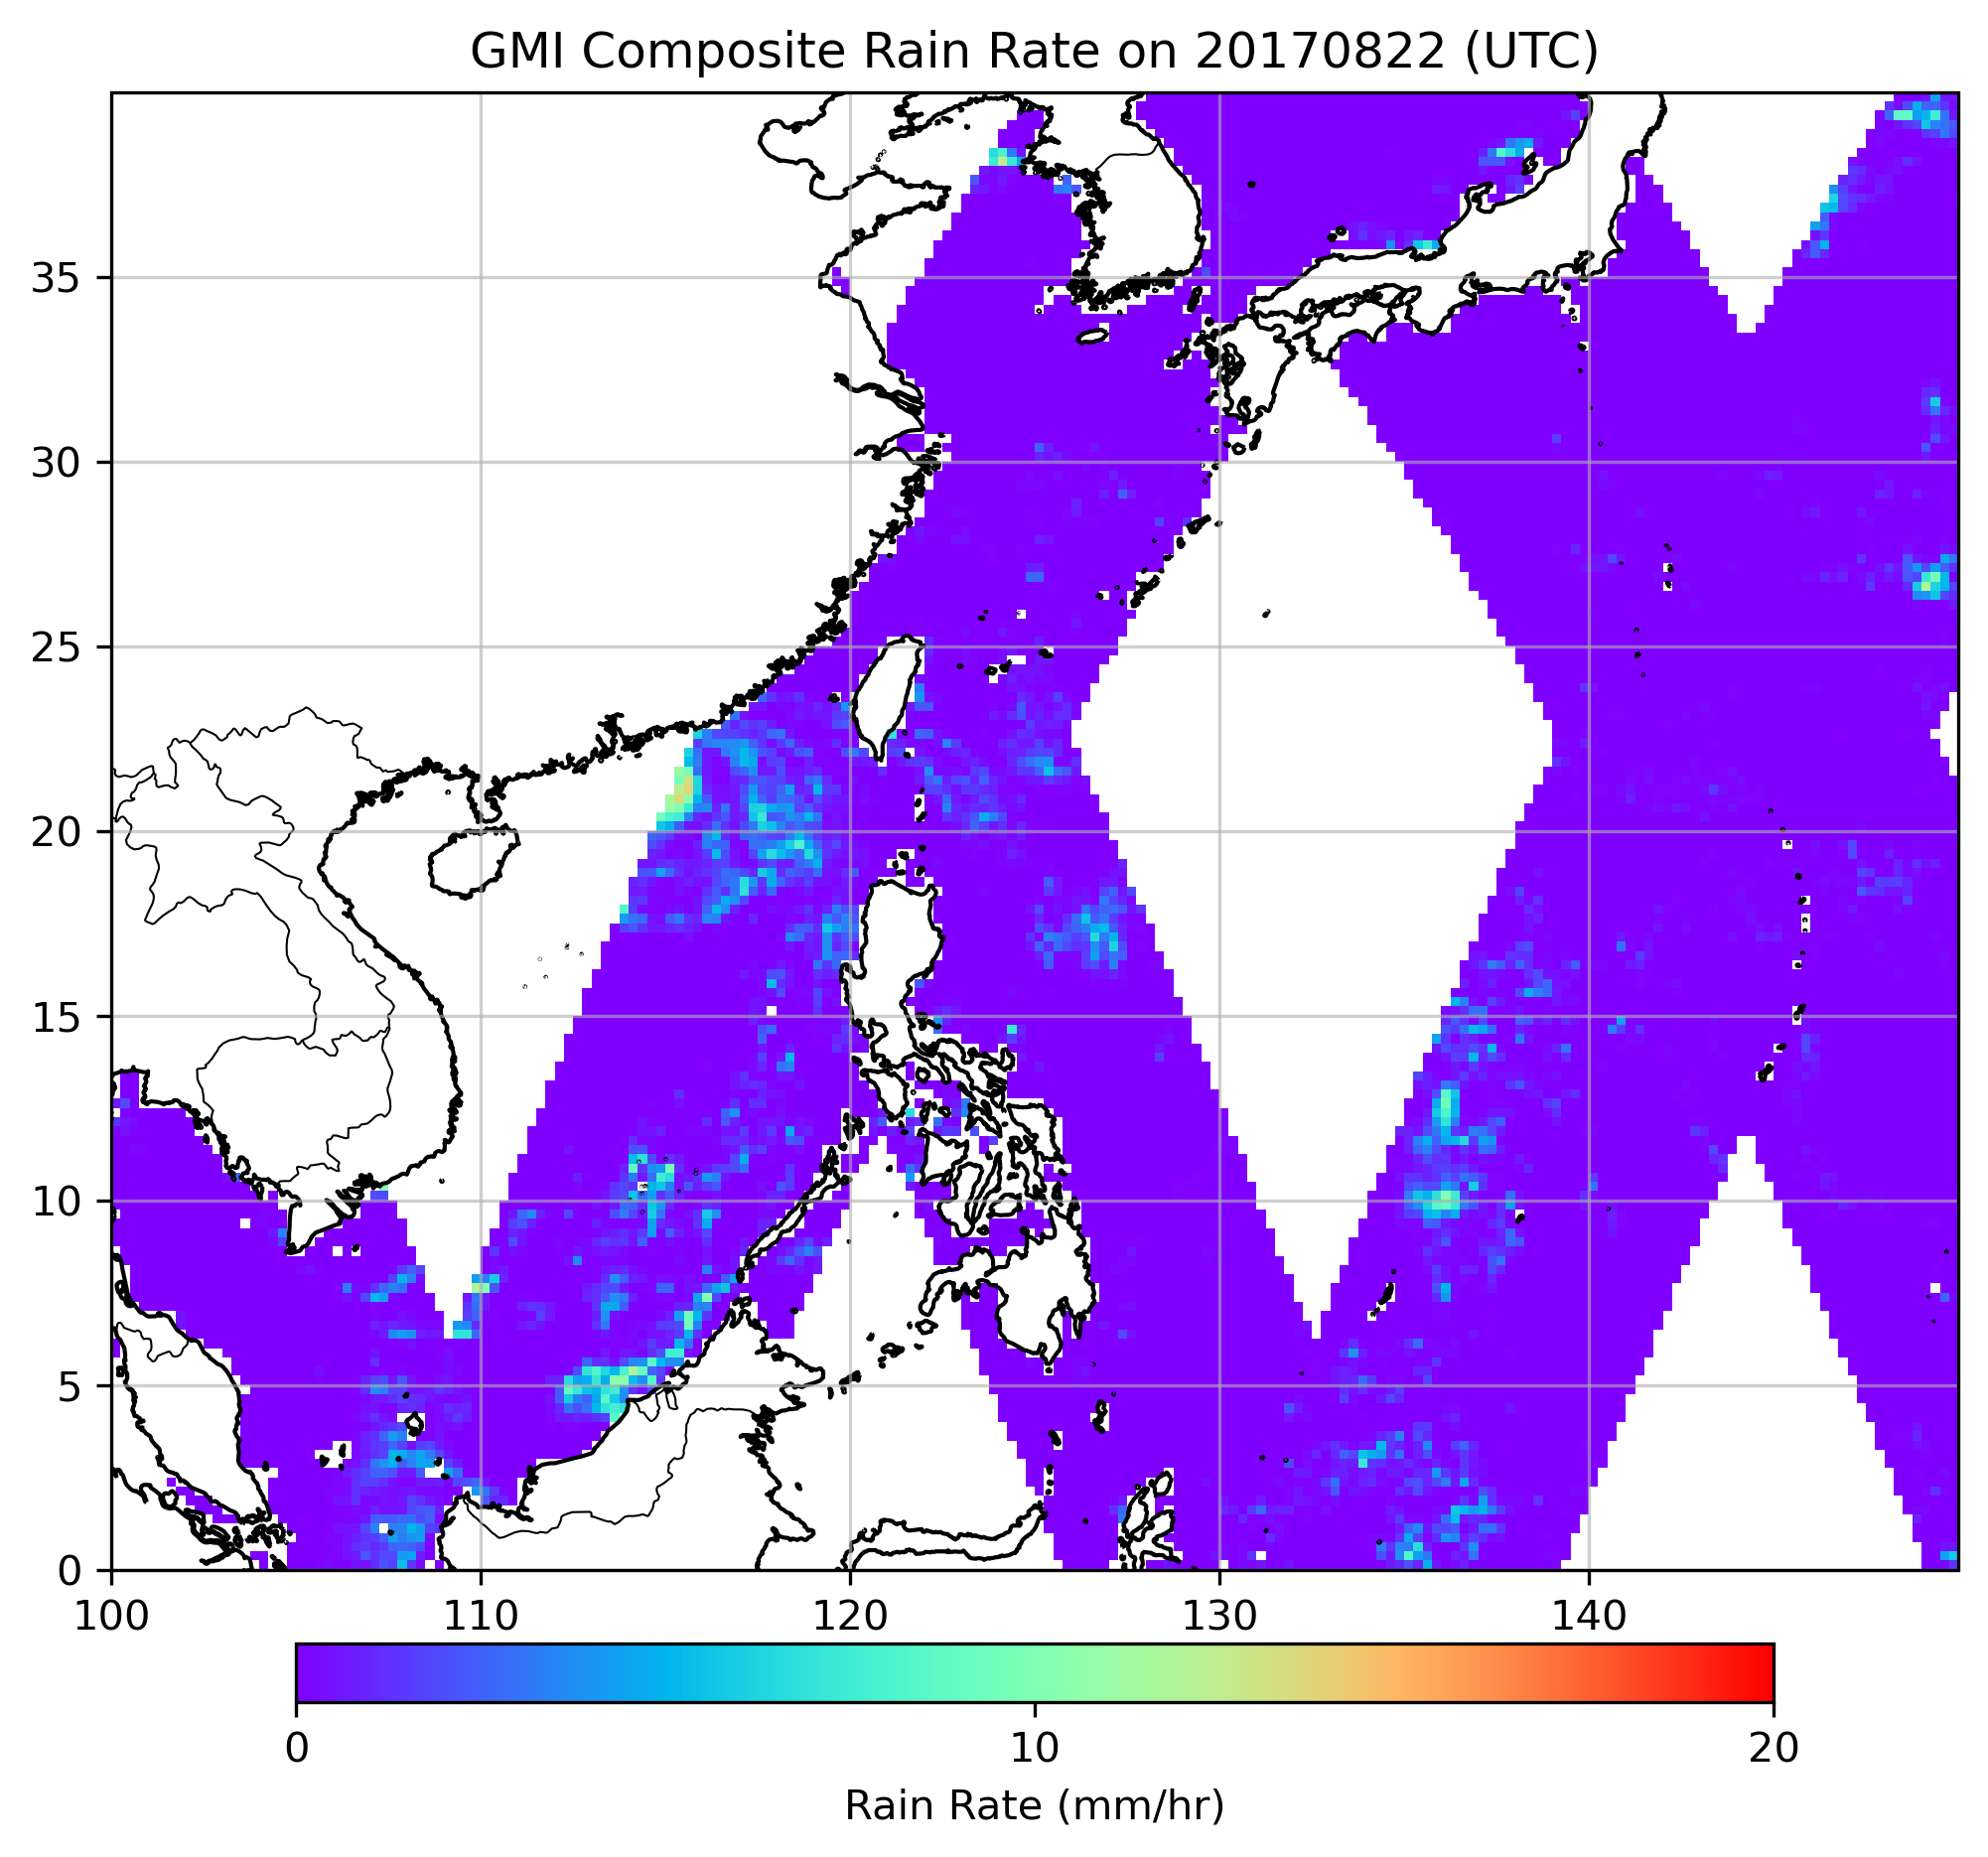

In [20]:
# 繪製雨率圖
plot_map(
    data=rain_composite,
    lat=Plot_Lat,
    lon=Plot_Lon,
    extent=[Lon_Min, Lon_Max, Lat_Min, Lat_Max],
    cmap=mpl.cm.rainbow,
    colorbar_range=np.arange(0, 21, 10),
    label='Rain Rate (mm/hr)',
    title=f'GMI Composite Rain Rate on {date} (UTC)',
    output_file=os.path.join(output_folder, f'GMI_rain_composite_{date.replace("-", "")}.png')
)

### composite SST

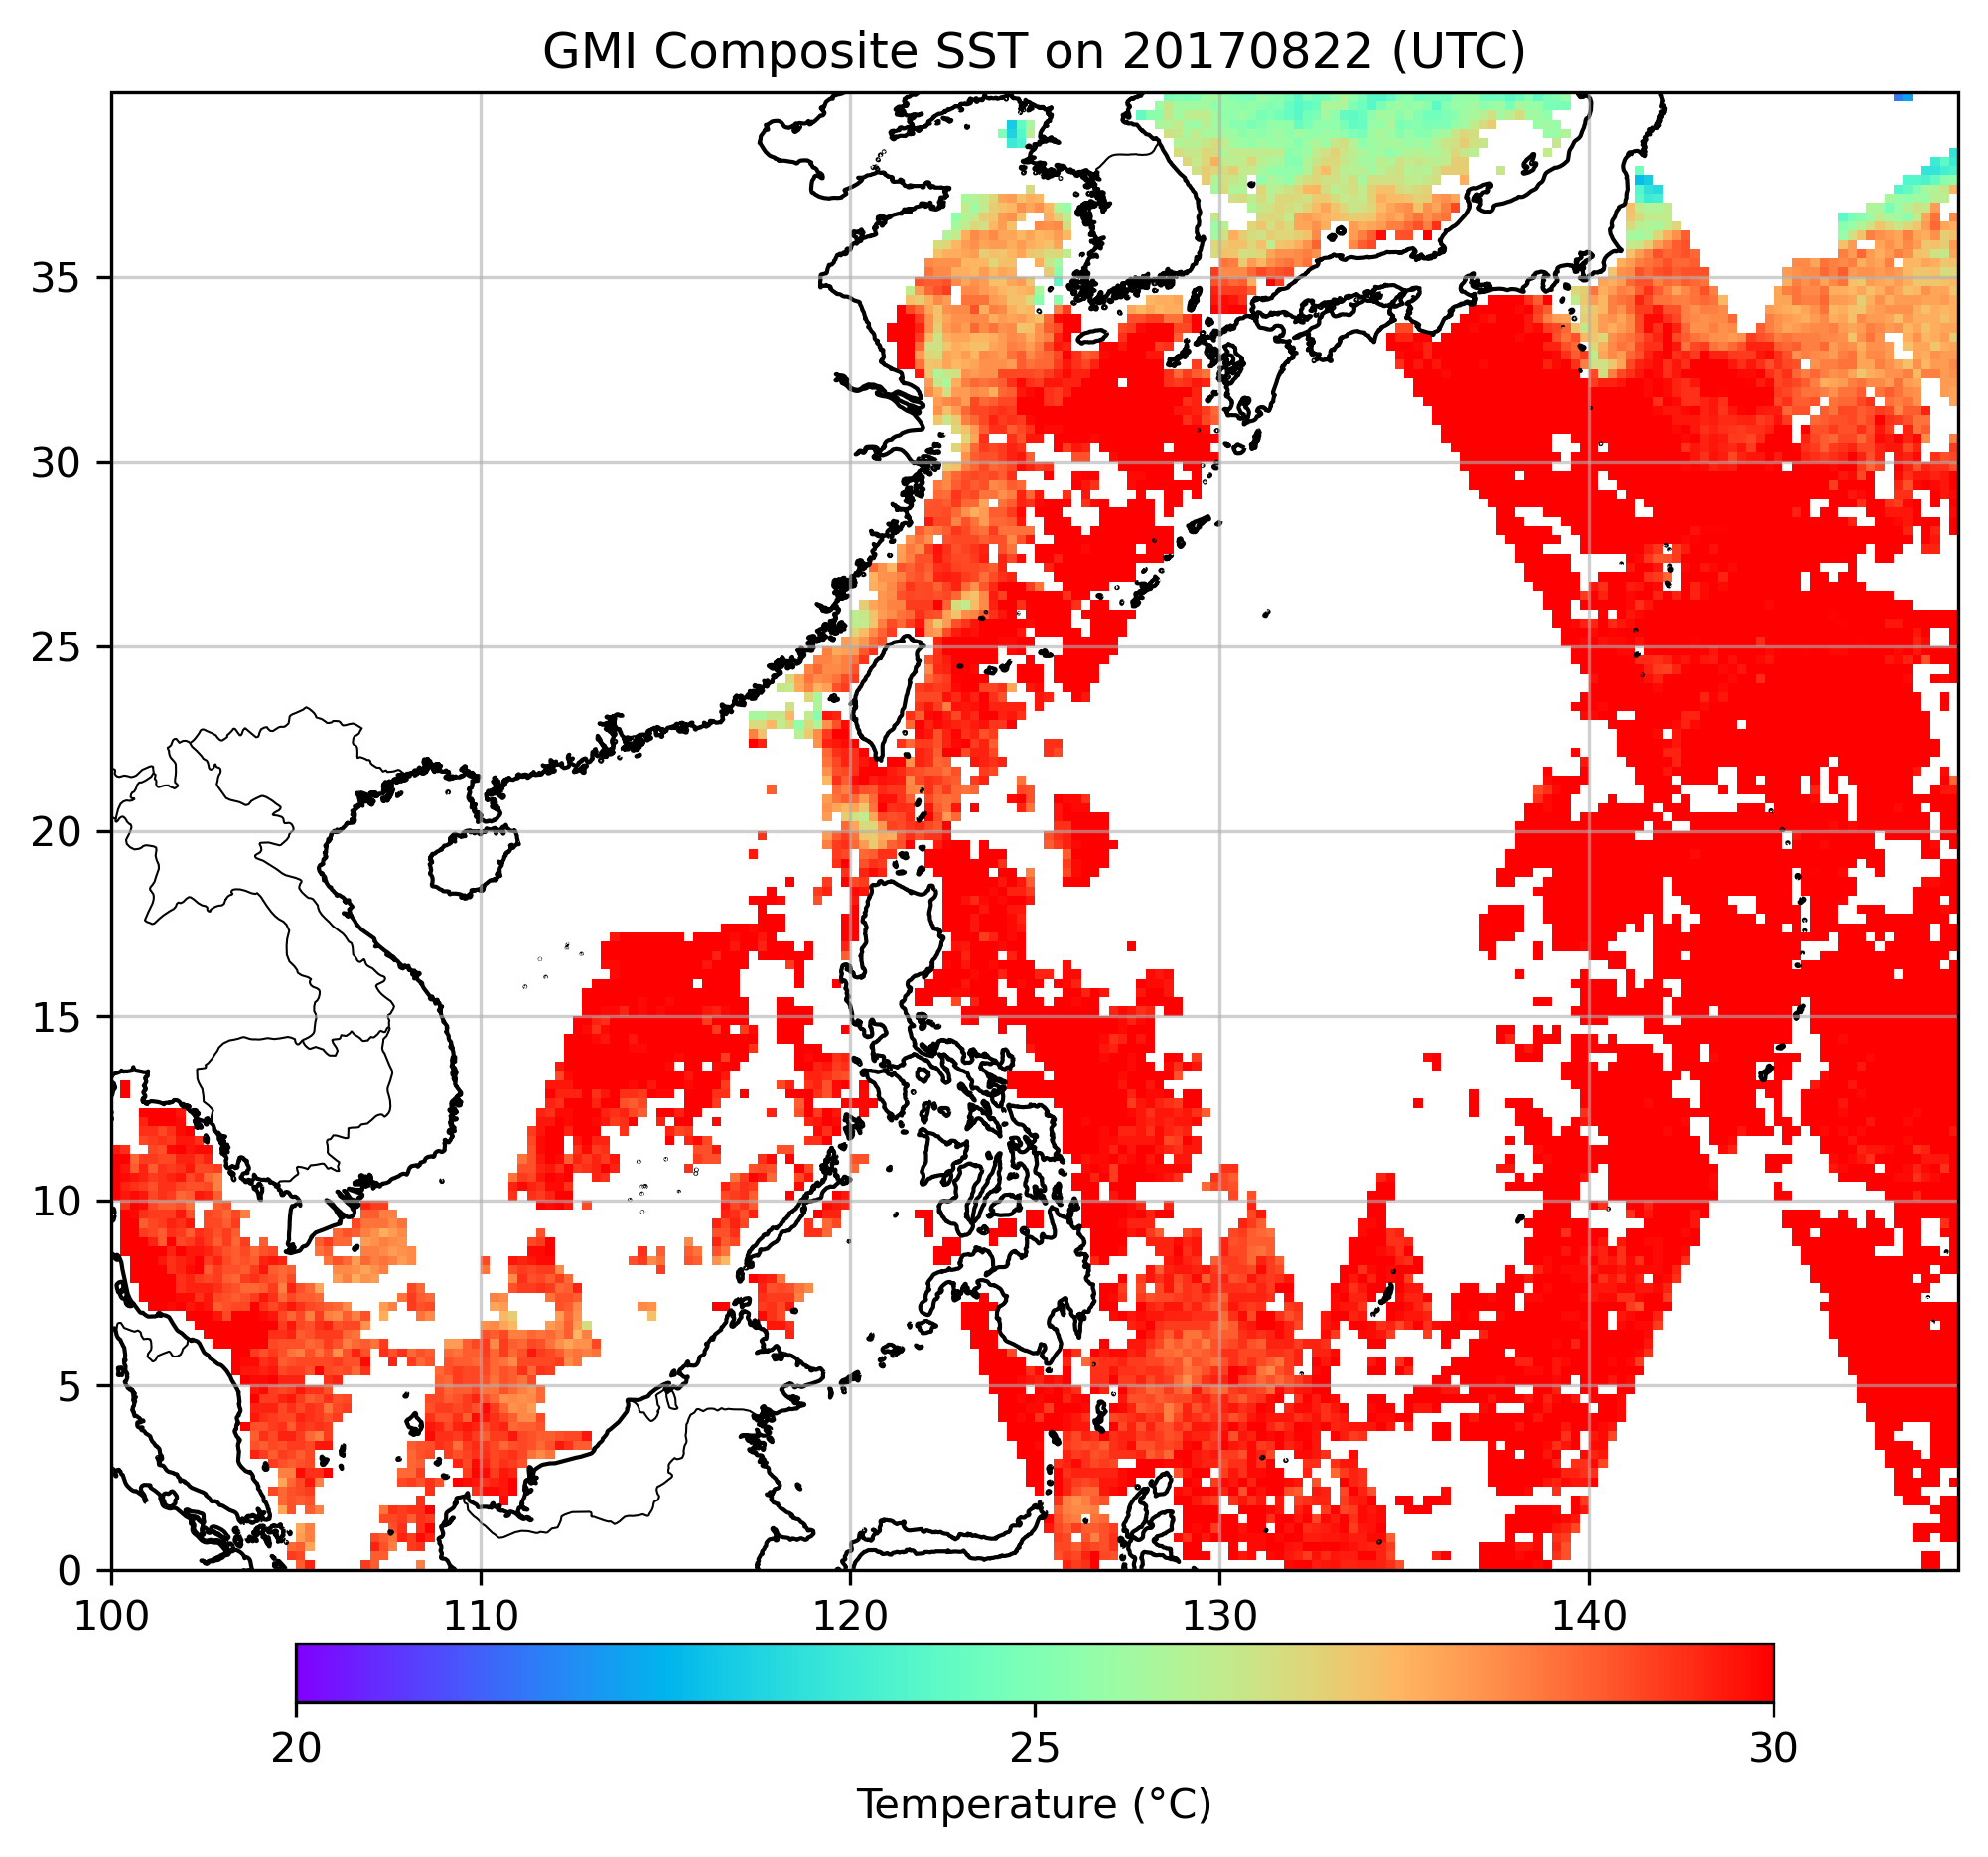

In [21]:
# 繪製海表面溫度圖
plot_map(
    data=sst_composite,
    lat=Plot_Lat,
    lon=Plot_Lon,
    extent=[Lon_Min, Lon_Max, Lat_Min, Lat_Max],
    cmap=mpl.cm.rainbow,
    colorbar_range=np.arange(20, 31, 5),
    label='Temperature (°C)',
    title=f'GMI Composite SST on {date} (UTC)',
    output_file=os.path.join(output_folder, f'GMI_SST_{date.replace("-", "")}.png')
)

### Valid SST

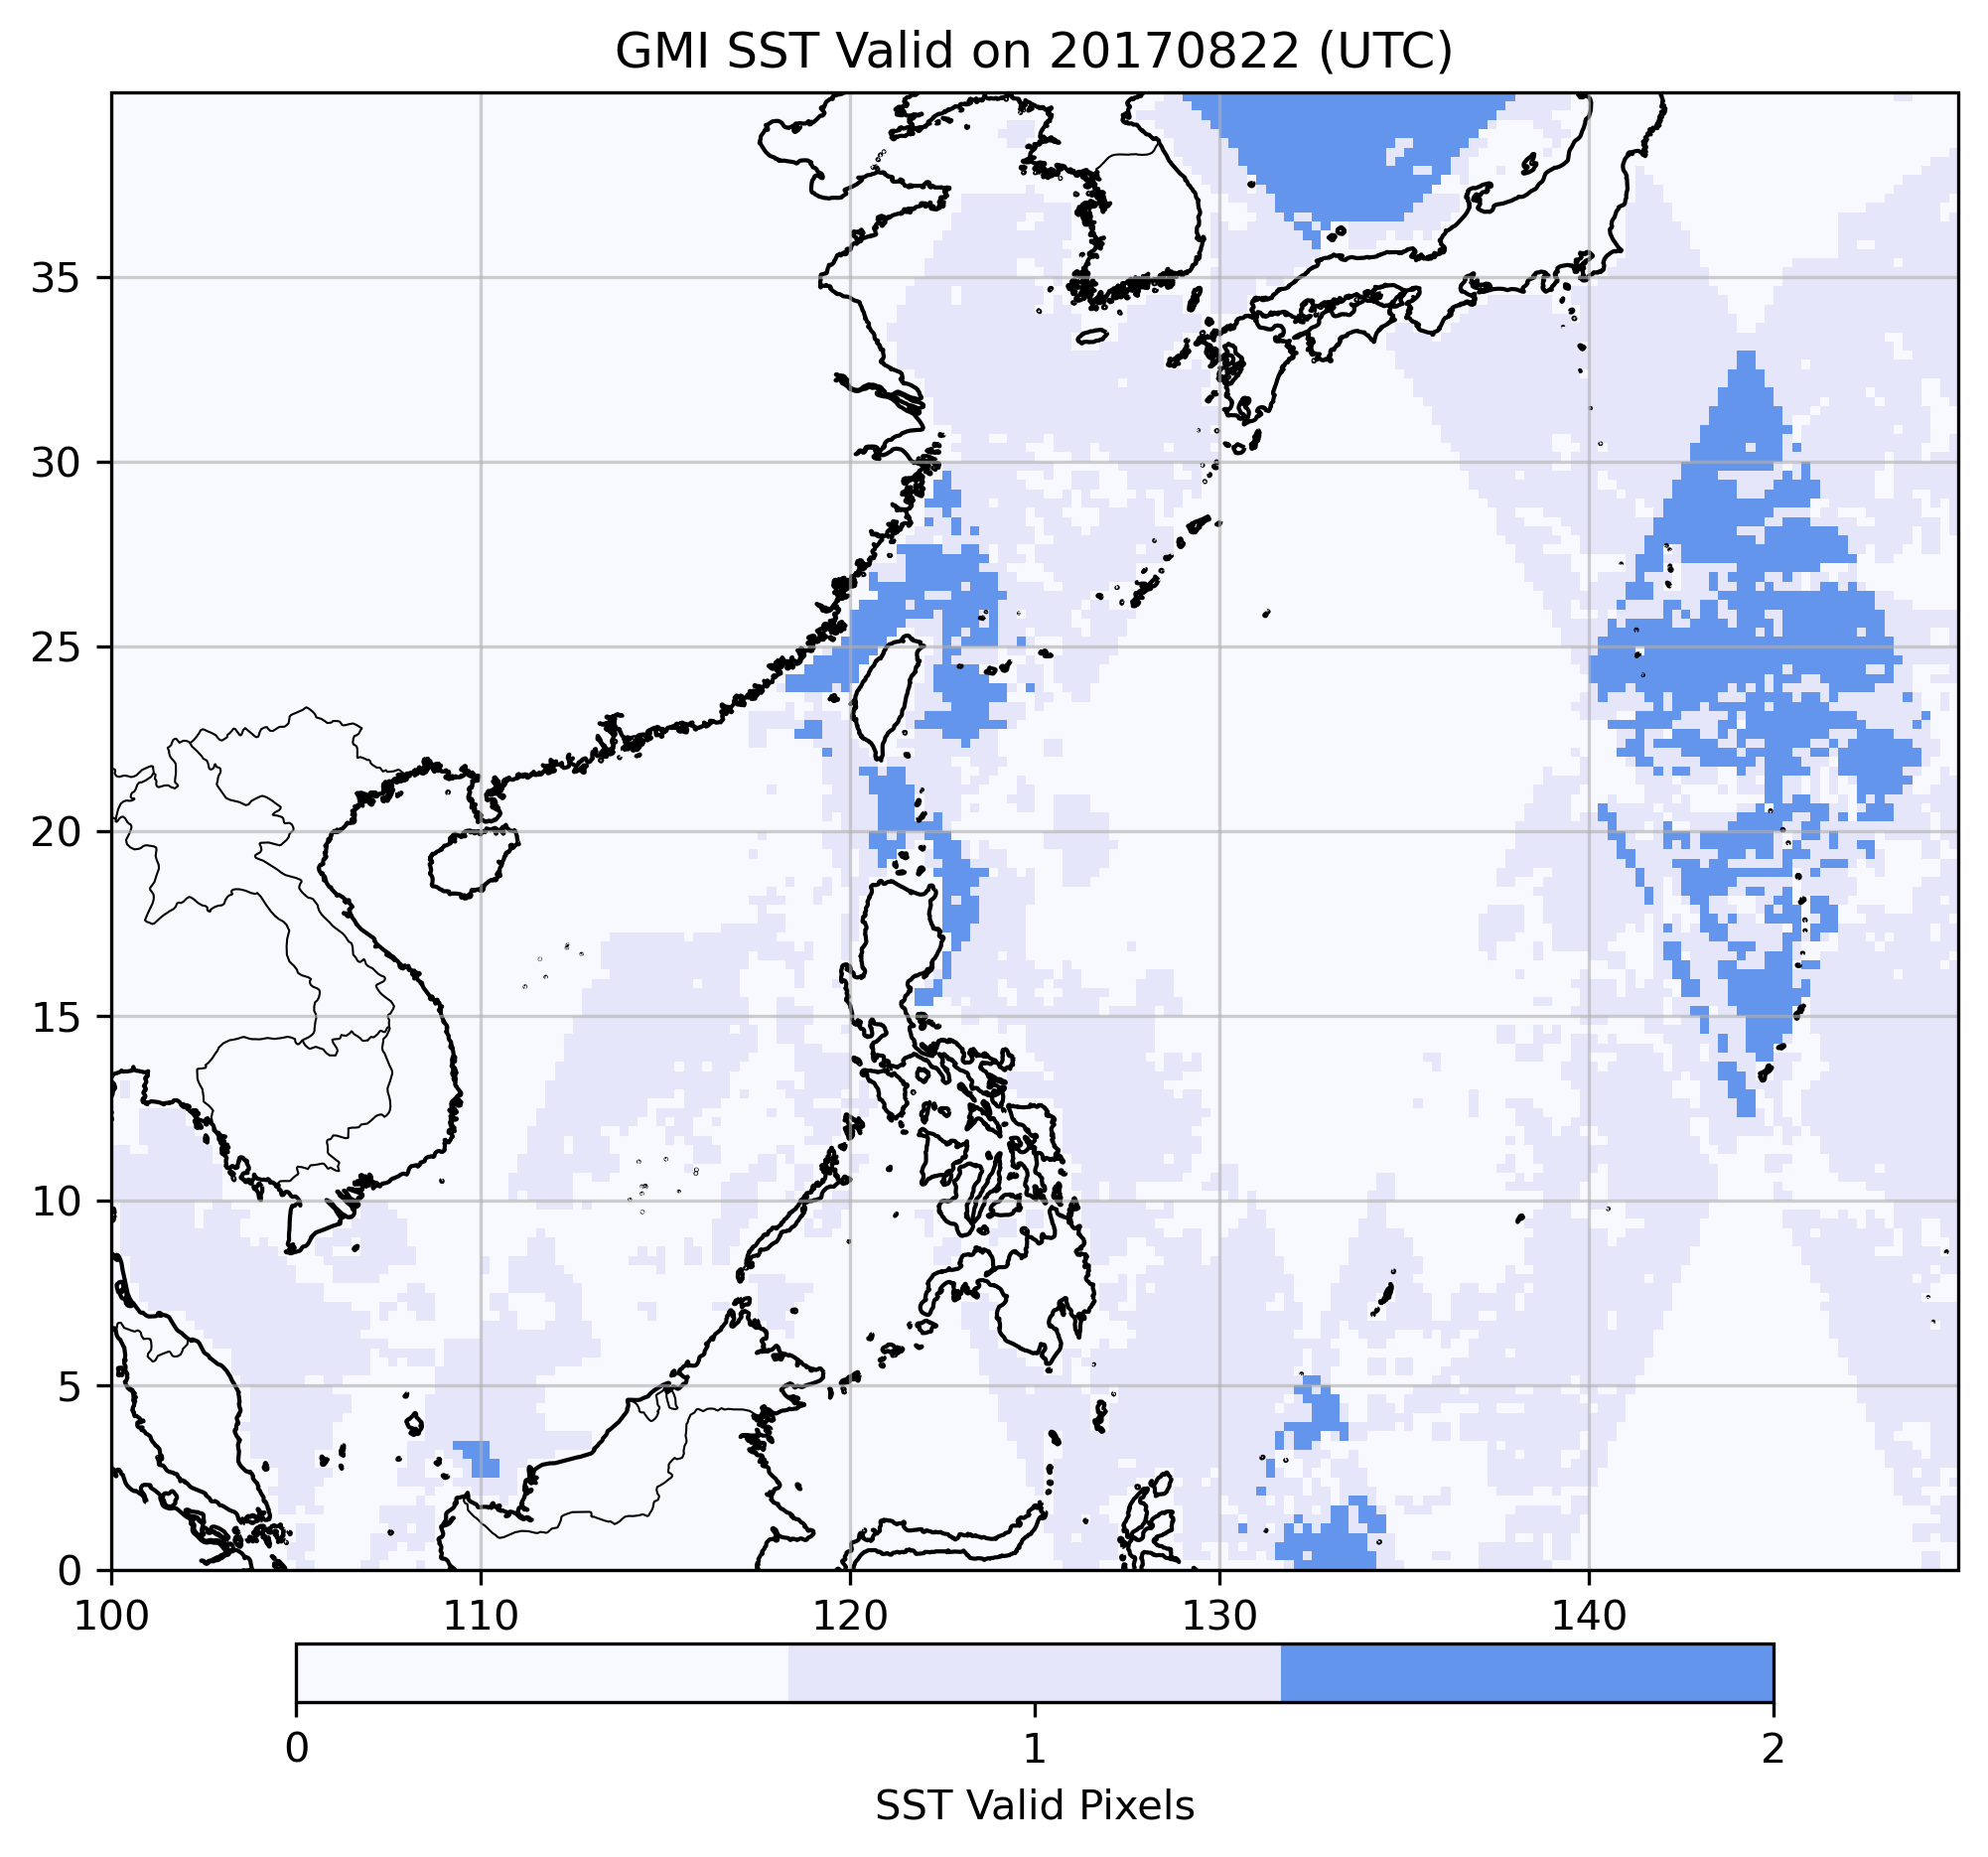

In [22]:
# 繪製有效像素數圖
plot_map(
    data=sstvp_composite,
    lat=Plot_Lat,
    lon=Plot_Lon,
    extent=[Lon_Min, Lon_Max, Lat_Min, Lat_Max],
    cmap=mcolors.ListedColormap(['ghostwhite', 'lavender', 'cornflowerblue']),
    colorbar_range=np.arange(0, 3, 1),
    label='SST Valid Pixels',
    title=f'GMI SST Valid on {date} (UTC)',
    output_file=os.path.join(output_folder, f'GMI_SST_Valid_{date.replace("-", "")}.png')
)